In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


/Users/musaidriss/anaconda3/envs/python_course/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
df_DA_UK = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United Kingdom')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_UK = df_DA_UK.dropna(subset=['salary_year_avg'])

df_DA_UK_exploded = df_DA_UK.explode('job_skills')

df_DA_UK_exploded[['salary_year_avg', 'job_skills']].head(5)


,salary_year_avg,job_skills
2602,51014.0,excel
2602,51014.0,word
2602,51014.0,outlook
16526,100500.0,sql
16526,100500.0,jupyter


In [13]:
# using df_DA find the count of skills and also the median salary for each skill
df_DA_skills = df_DA_UK_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

DA_job_count = len(df_DA_UK)  # Find count of Data Analyst jobs in US with salary info

df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100

skill_percent = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_percent]

df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,33,98500.0,45.833333
excel,29,75550.0,40.277778
python,25,89100.0,34.722222
tableau,13,100500.0,18.055556
r,9,77017.5,12.500000
go,9,71000.0,12.500000
sas,8,80007.0,11.111111
power bi,7,89100.0,9.722222
looker,6,96012.5,8.333333


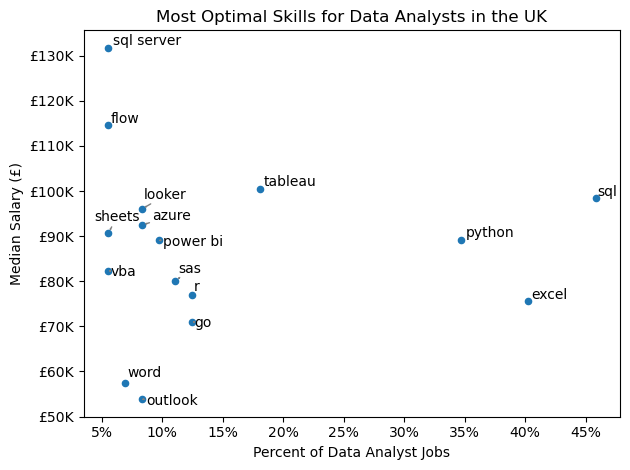

In [24]:
from adjustText import adjust_text

# Scatter plot
df_DA_skills_high_demand.plot(kind='scatter', x='skill_percent', y='median_salary')

# Prepare texts for adjustText
texts = []  # make sure this matches the variable name
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(
        plt.text(
            df_DA_skills_high_demand['skill_percent'].iloc[i],
            df_DA_skills_high_demand['median_salary'].iloc[i],
            txt  # add the skill name as label
        )
    )

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary (£)')
plt.title('Most Optimal Skills for Data Analysts in the UK')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'£{int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.tight_layout()
plt.show()


In [25]:
df['job_type_skills'].head(10)

0                                                 None
1    {'analyst_tools': ['power bi', 'tableau'], 'pr...
2    {'analyst_tools': ['dax'], 'cloud': ['azure'],...
3    {'cloud': ['aws'], 'libraries': ['tensorflow',...
4    {'cloud': ['oracle', 'aws'], 'other': ['ansibl...
5    {'cloud': ['gcp'], 'programming': ['python', '...
6    {'cloud': ['gcp', 'bigquery'], 'databases': ['...
7    {'cloud': ['gcp', 'azure', 'aws', 'bigquery', ...
8    {'analyst_tools': ['excel', 'powerpoint', 'pow...
9    {'analyst_tools': ['excel'], 'cloud': ['azure'...
Name: job_type_skills, dtype: object

# Extra we learnt but more detail. 
Told we can copy and paste

In [26]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['powerpoint',
  'microstrategy',
  'tableau',
  'power bi',
  'sap',
  'visio',
  'nuix',
  'esquisse',
  'spreadsheet',
  'ssrs',
  'ms access',
  'sas',
  'word',
  'sheets',
  'msaccess',
  'cognos',
  'looker',
  'outlook',
  'datarobot',
  'excel',
  'sharepoint',
  'dax',
  'spss',
  'ssis',
  'qlik',
  'splunk',
  'alteryx',
  'powerbi'],
 'programming': ['swift',
  'matlab',
  'groovy',
  'vb.net',
  'lua',
  'ruby',
  'python',
  'solidity',
  'nosql',
  'r',
  'css',
  't-sql',
  'crystal',
  'sql',
  'shell',
  'apl',
  'c',
  'bash',
  'sas',
  'html',
  'kotlin',
  'f#',
  'erlang',
  'c#',
  'lisp',
  'delphi',
  'php',
  'powershell',
  'mongodb',
  'typescript',
  'pascal',
  'clojure',
  'javascript',
  'mongo',
  'perl',
  'sass',
  'ocaml',
  'java',
  'haskell',
  'rust',
  'scala',
  'golang',
  'dart',
  'go',
  'cobol',
  'vba',
  'fortran',
  'assembly',
  'objective-c',
  'c++',
  'julia',
  'elixir',
  'visualbasic',
  'visual basic',
  'no-

In [27]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,powerpoint
0,analyst_tools,microstrategy
0,analyst_tools,tableau
0,analyst_tools,power bi
0,analyst_tools,sap
...,...,...
9,sync,ringcentral
9,sync,rocketchat
9,sync,symphony
9,sync,webex


In [29]:
df_plot = df_DA_skills_high_demand.merge(df_technology, left_on='job_skills', right_on='skills')

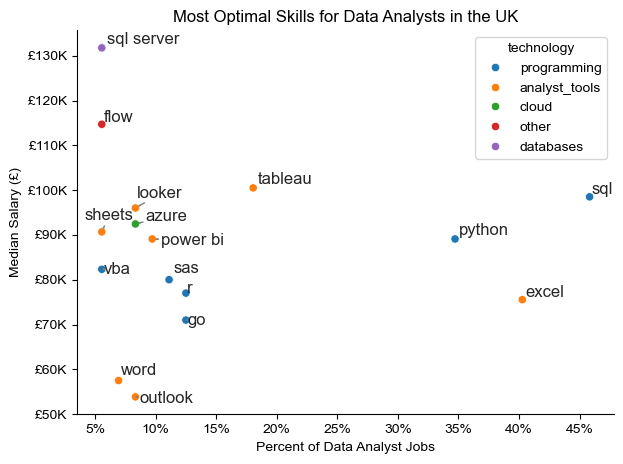

In [34]:
from adjustText import adjust_text

# Scatter plot
# df_DA_skills_high_demand.plot(kind='scatter', x='skill_percent', y='median_salary')
sns.scatterplot(
    data=df_plot,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)

sns.despine()
sns.set_theme(style='ticks')

# Prepare texts for adjustText
texts = []  # make sure this matches the variable name
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(
        plt.text(
            df_DA_skills_high_demand['skill_percent'].iloc[i],
            df_DA_skills_high_demand['median_salary'].iloc[i],
            txt  # add the skill name as label
        )
    )

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary (£)')
plt.title('Most Optimal Skills for Data Analysts in the UK')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'£{int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.tight_layout()
plt.show()